In [ ]:
import sym_sinekan

import netket as nk
import numpy as np
import matplotlib.pyplot as plt
import optax

In [ ]:
m2s = []
h_values = [0]
for h in h_values:
    # Define system size
    L = 20  # Number of spins
    J = -1
    batch_size = 1024

    # Define the 1D spin chain with periodic boundary conditions (PBC)
    g = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
    # Define the Hilbert space
    hi = nk.hilbert.Spin(s=0.5, N=g.n_nodes)
    ham = nk.operator.Ising(h=h, hilbert=hi, J=J, graph=g)
    # Initialize m^2 storage
    ma = sym_sinekan.SineKAN(layers_hidden = (64,64,1), grid_size=8)
    vs = nk.vqs.MCState(nk.sampler.MetropolisLocal(hi, n_chains = batch_size), ma, n_samples = batch_size, chunk_size = batch_size, seed=42)

    n_epochs = 100

    scheduler = optax.schedules.linear_schedule(1e-2, 1e-6, n_epochs//2, n_epochs//2)
    opt = nk.optimizer.Adam(learning_rate=scheduler)  # Use Adam for stable optimization
    gs = nk.VMC(ham, optimizer=opt, variational_state=vs)
    gs.run(n_iter= n_epochs, out="ising_SymSineKAN")  # Training uses 400000 samples
    corr = sum([nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i + L // 2) % L) for i in range(L)])
    m2 = vs.expect(corr).mean.real / L  # Normalize by L
    m2s.append(m2)
    E = vs.expect(ham)
    print(E.mean.real, E.variance.real, m2)

  0%|          | 0/100 [00:00<?, ?it/s]

-20.0 0.0 1.0


In [ ]:
m2s = []
h_values = np.arange(0, 2.1, .1)
for h in h_values:
    # Define system size
    L = 20  # Number of spins
    J = -1
    batch_size = 1024

    # Define the 1D spin chain with periodic boundary conditions (PBC)
    g = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
    # Define the Hilbert space
    hi = nk.hilbert.Spin(s=0.5, N=g.n_nodes)
    ham = nk.operator.Ising(h=h, hilbert=hi, J=J, graph=g)
    # Initialize m^2 storage
    ma = sym_sinekan.SineKAN(layers_hidden = (64,64,1), grid_size=8)
    vs = nk.vqs.MCState(nk.sampler.MetropolisLocal(hi, n_chains = batch_size), ma, n_samples = batch_size, chunk_size = batch_size, seed=42)

    n_epochs = 10000

    scheduler = optax.schedules.linear_schedule(1e-4, 1e-6, n_epochs//2, n_epochs//2)
    opt = nk.optimizer.Adam(learning_rate=scheduler)  # Use Adam for stable optimization
    gs = nk.VMC(ham, optimizer=opt, variational_state=vs)
    gs.run(n_iter= n_epochs, out="ising_SymSineKAN")  # Training uses 400000 samples
    corr = sum([nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i + L // 2) % L) for i in range(L)])
    m2 = vs.expect(corr).mean.real / L  # Normalize by L
    m2s.append(m2)
    E = vs.expect(ham)
    print(E.mean.real, E.variance.real, m2)

  0%|          | 0/10000 [00:00<?, ?it/s]

-16.0 0.0 0.384765625


  0%|          | 0/10000 [00:00<?, ?it/s]

-20.049941714139916 2.6049215024342498e-06 0.9970703125


  0%|          | 0/10000 [00:00<?, ?it/s]

-20.198056138661194 0.002106033180538726 0.989453125


  0%|          | 0/10000 [00:00<?, ?it/s]

-20.4491304088584 0.007845931107131707 0.976953125


  0%|          | 0/10000 [00:00<?, ?it/s]

-20.80839920962171 0.0015066763985602922 0.9572265625


  0%|          | 0/10000 [00:00<?, ?it/s]

-21.27189365263621 0.003283645271206597 0.9310546875


  0%|          | 0/10000 [00:00<?, ?it/s]

-21.84725014232972 0.0039087501644246864 0.8974609375


  0%|          | 0/10000 [00:00<?, ?it/s]

-22.53589460450603 0.010748506756953687 0.8470703125


  0%|          | 0/10000 [00:00<?, ?it/s]

-23.36001259244513 0.008321409483013572 0.78046875


  0%|          | 0/10000 [00:00<?, ?it/s]

-24.325534908259577 0.017547469976001227 0.64765625


  0%|          | 0/10000 [00:00<?, ?it/s]

-25.48771194188157 0.019395089184140388 0.421875


  0%|          | 0/10000 [00:00<?, ?it/s]

-26.86334029989084 0.017384088708746324 0.1953125


  0%|          | 0/10000 [00:00<?, ?it/s]

-28.390021868213083 0.013373733622022774 0.0755859375


  0%|          | 0/10000 [00:00<?, ?it/s]

-30.01527108839364 0.012744389677145099 0.04140625


  0%|          | 0/10000 [00:00<?, ?it/s]

-31.702346897358076 0.009668435597564015 0.026953125


  0%|          | 0/10000 [00:00<?, ?it/s]

-33.43943146325182 0.008333597707511877 0.02578125


  0%|          | 0/10000 [00:00<?, ?it/s]

-35.206037249881774 0.008054681626013006 -0.00703125


  0%|          | 0/10000 [00:00<?, ?it/s]

-37.01138400696801 0.007115450434148662 0.016796875


  0%|          | 0/10000 [00:00<?, ?it/s]

-38.833910614973874 0.006741649298780939 -0.0033203125


  0%|          | 0/10000 [00:00<?, ?it/s]

-40.67943532706705 0.0063508687018718245 0.003125


  0%|          | 0/10000 [00:00<?, ?it/s]

-42.54100022721104 0.005630643104210044 0.001171875


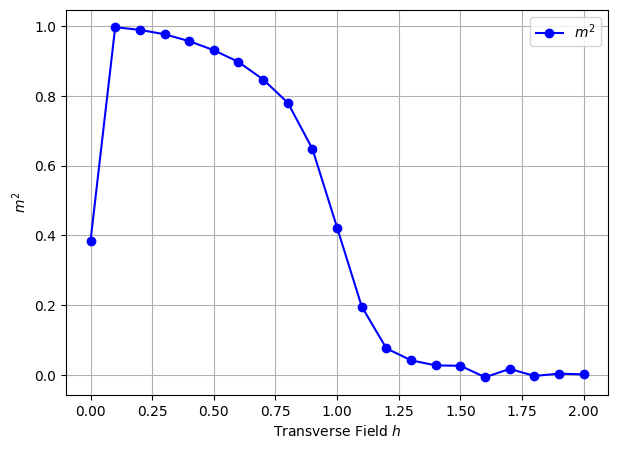

In [ ]:
# Plot results
plt.figure(figsize=(7, 5))
plt.plot(h_values, m2s, marker="o", linestyle="-", color="b", label=r"$m^2$")
plt.xlabel(r"Transverse Field $h$")
plt.ylabel(r"$m^2$")
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 8

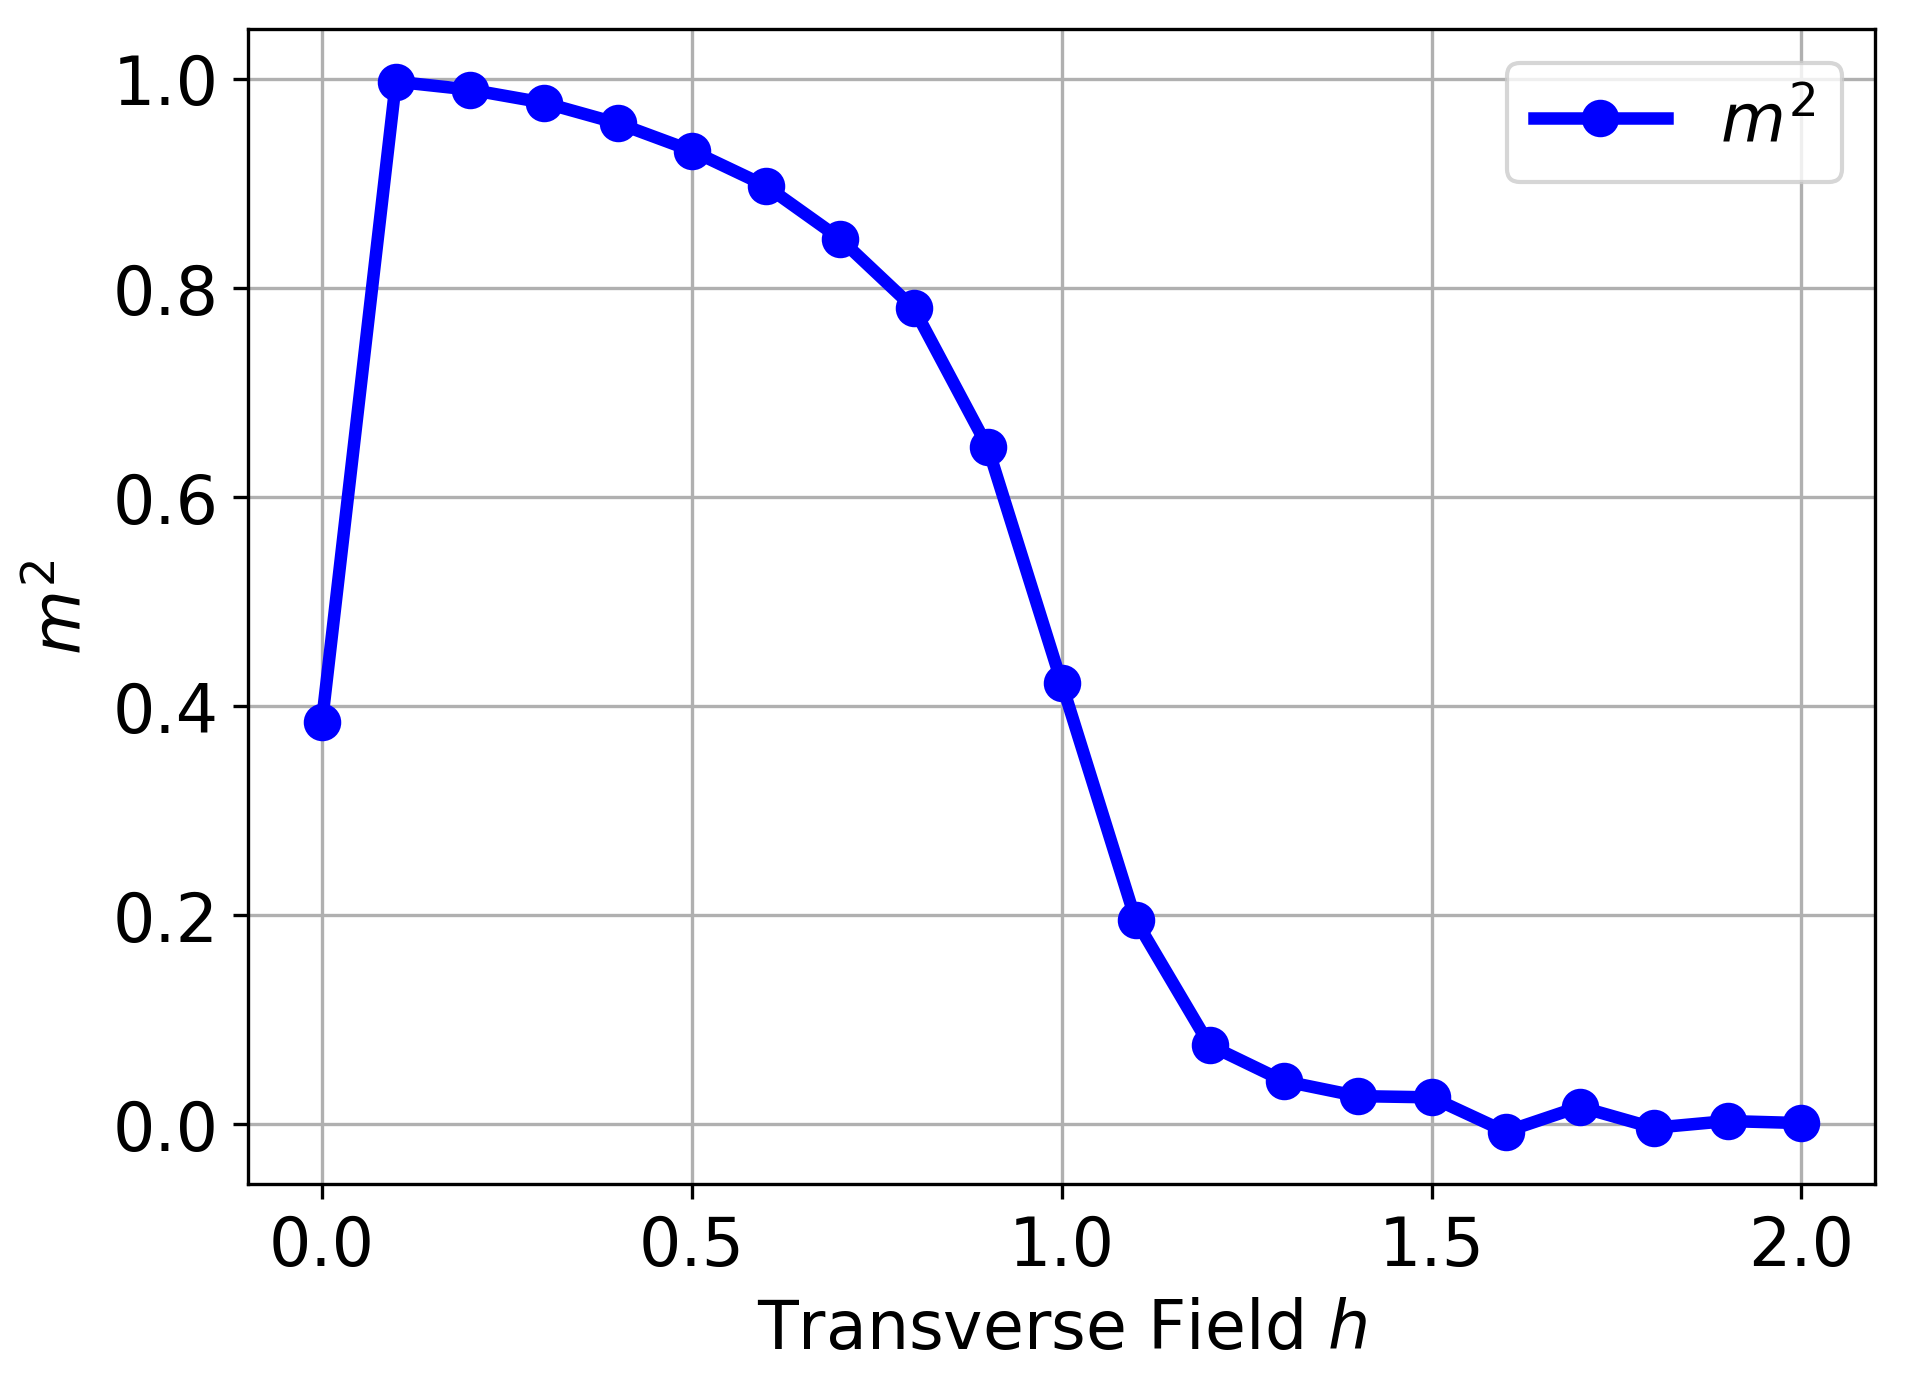

In [ ]:
# Plot results
plt.figure(figsize=(7, 5))
plt.plot(h_values, m2s, marker="o", linestyle="-", color="b", label=r"$m^2$")
plt.xlabel(r"Transverse Field $h$")
plt.ylabel(r"$m^2$")
plt.legend()
plt.grid()
plt.show()